## Machine Learning

Innerhalb eines gegebenen Datensets Zusammenhänge erkennen

Aus diesen Zusammenhängen neue Erkenntnisse bestimmen

-> Aus neuen Daten "Vorhersagen" treffen

---

Model:

Ergebnis des Lernprozesses

Binary, welche auf beliebigen Geräten/Betriebssystemen verwendet werden kann, um mit neuen Daten Vorhersagen zu treffen

Neue Daten müssen die selbe Struktur haben, wie die Daten, die im Lernprozess verwendet wurden

---

Beispiel: Wettermodell

Parameter: Datum, Uhrzeit, Wolken %, Niederschlag % -> Temperatur

Daten: 09-09, 13:15, 20%, 0% -> 24°C, 23°C; Realität: 22°C

In der Realität, hat das Wetter noch deutlich mehr Parameter

z.B.: Wind, Windrichtung, Längengrad, Breitegrad, Sonneneinstrahlung, ...

4 Parameter sind per Hand noch machbar, ab 10 Parametern eher schwierig

---

Jetzt kann ML eingesetzt werden, um beliebig große Datensets zu verarbeiten

### Income.csv

Dieses Datenset enthält Personendaten, welche beschreiben, ob eine gegebene Person über/unter 50.000$/Jahr verdient

Über ML soll die Frage beantwortet werden

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("Data/Income.csv")

In [10]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


#### Datenset anpassen

Das Datenset ist für ML noch nicht verwendbar:

- Text durch Zahlen austauschen
- Skalieren (Outlier entfernen)
- Unebenheiten bei der class-Spalte ausgleichen

In [14]:
data["class"] == ">50K"

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: class, Length: 32561, dtype: bool

In [15]:
(data["class"] == ">50K").astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: class, Length: 32561, dtype: int64

In [16]:
data["class"] = (data["class"] == ">50K").astype(int)

In [17]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


#### Alle Werte numerisch machen

Hier wird der sog. LabelEncoder verwendet

Weist jedem Text eine eigene Nummer zu, ersetzt alle Texte mit der gegebenen Nummer

Neues Paket: scikit-learn

In [20]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
data["workclass"] = enc.fit_transform(data["workclass"])

Alle Spalten konvertieren, welche vom Typ Object sind

In [27]:
for col in data.select_dtypes(object).columns:
    enc = LabelEncoder()
    data[col] = enc.fit_transform(data[col])

In [28]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


#### Aufteilen

Das Datenset muss hier in Trainingsdaten und Testdaten geteilt werden

Und zusätzlich muss die linke Seite des DS (die Daten) und die rechte Seite (die Klasse) getrennt werden

In [49]:
random = data.sample(frac=1)
p80 = int(len(random) * 0.8)

training = random[0:p80]
test = random[p80:]

training_left = training.iloc[:, 0:-1]
training_right = training.iloc[:, -1]

test_left = test.iloc[:, 0:-1]
test_right = test.iloc[:, -1]

#### Skalieren

Outlier entfernen; Zahlen im Datenset "normalisieren"

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
training_left = pd.DataFrame(scaler.fit_transform(training_left))

scaler = StandardScaler()
test_left = pd.DataFrame(scaler.fit_transform(test_left))

In [60]:
training_left

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.265150,-1.281632,-0.122420,1.210927,-0.030367,-0.405397,-0.607336,-0.900790,0.391799,0.705662,-0.147964,5.715338,-0.033437,0.294164
1,-0.558108,2.143135,-1.559361,0.437435,1.523677,-1.733506,-1.316345,-0.280515,0.391799,-1.417110,-0.147964,-0.215405,-1.254530,0.294164
2,-0.704587,0.088275,-0.805230,1.210927,-0.030367,-1.733506,1.519692,-0.280515,0.391799,0.705662,-0.147964,-0.215405,1.431874,0.294164
3,-0.265150,-1.281632,-0.261958,-0.336057,1.135166,-1.733506,0.810683,-0.280515,0.391799,0.705662,-0.147964,-0.215405,-0.033437,-0.463725
4,-1.510221,0.088275,0.094135,-2.140870,-0.807390,0.922711,-1.316345,0.960036,0.391799,0.705662,-0.147964,-0.215405,-0.440468,0.294164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,-0.338390,0.088275,-0.442424,0.179604,-0.418878,-0.405397,1.283355,2.200587,0.391799,-1.417110,-0.147964,-0.215405,-2.068592,0.294164
26044,1.126400,1.458182,-1.309565,1.210927,-0.030367,-0.405397,1.283355,-0.900790,0.391799,0.705662,-0.147964,-0.215405,-0.033437,0.294164
26045,-1.363742,-1.966585,0.336646,1.210927,-0.030367,0.922711,1.519692,0.960036,0.391799,-1.417110,-0.147964,-0.215405,-1.335936,0.294164
26046,1.419358,0.088275,-0.772692,1.210927,-0.030367,-1.733506,-1.316345,1.580312,0.391799,-1.417110,-0.147964,-0.215405,-0.033437,0.294164


#### Unebenheiten ausgleichen

Klassen (0 und 1) ausgleichen

Verhindern, das beim ML Prozess ein Bias entwickelt wird

WICHTIG: Nur beim Trainingsset (nicht beim Testset)

In [61]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

left, right = ros.fit_resample(training_left, training_right)

In [62]:
left

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.265150,-1.281632,-0.122420,1.210927,-0.030367,-0.405397,-0.607336,-0.900790,0.391799,0.705662,-0.147964,5.715338,-0.033437,0.294164
1,-0.558108,2.143135,-1.559361,0.437435,1.523677,-1.733506,-1.316345,-0.280515,0.391799,-1.417110,-0.147964,-0.215405,-1.254530,0.294164
2,-0.704587,0.088275,-0.805230,1.210927,-0.030367,-1.733506,1.519692,-0.280515,0.391799,0.705662,-0.147964,-0.215405,1.431874,0.294164
3,-0.265150,-1.281632,-0.261958,-0.336057,1.135166,-1.733506,0.810683,-0.280515,0.391799,0.705662,-0.147964,-0.215405,-0.033437,-0.463725
4,-1.510221,0.088275,0.094135,-2.140870,-0.807390,0.922711,-1.316345,0.960036,0.391799,0.705662,-0.147964,-0.215405,-0.440468,0.294164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39483,0.394005,0.088275,5.386690,0.179604,-0.418878,-0.405397,-0.843672,-0.900790,0.391799,0.705662,-0.147964,-0.215405,2.408749,0.294164
39484,1.639077,0.773229,-1.006996,0.179604,-0.418878,-0.405397,-0.607336,-0.900790,0.391799,0.705662,-0.147964,-0.215405,-0.440468,0.294164
39485,1.492598,0.088275,-0.472228,1.210927,-0.030367,1.586766,1.283355,-0.280515,0.391799,0.705662,1.775518,-0.215405,1.594687,0.294164
39486,0.979921,0.088275,0.658955,0.179604,-0.418878,-0.405397,-0.843672,-0.900790,0.391799,0.705662,-0.147964,-0.215405,0.780625,0.294164


In [65]:
training_left = pd.DataFrame(left)
training_right = pd.DataFrame(right)

### Verschiedene vorgegebene Algorithmen

#### k-nearest Neighbors (kNN)

- Neuer Datensatz soll klassifiziert werden
- Nachbarn (ähnliche Datensätze) werden auf Klasse überprüft
- Über den Wert k (Anzahl), wird die Klasse anhand der Anzahl der Datensätzen in der Umgebung ausgewählt

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn = KNeighborsClassifier(n_neighbors=7)

In [94]:
knn_model = knn.fit(training_left, training_right.values.reshape(-1))  # Diese Zelle startet Machine Learning

In [95]:
prediction = knn_model.predict(test_left)

In [96]:
vc = (prediction == test_right).value_counts()

In [97]:
vc[False] / vc[True]

np.float64(0.29251835681682875)

In [98]:
def eval(model):
    prediction = model.predict(test_left)
    vc = (prediction == test_right).value_counts()
    print(f"Richtige Vorhersagen: {(1 - vc[False] / vc[True]) * 100}%")

In [99]:
eval(knn_model)

Richtige Vorhersagen: 70.74816431831712%


#### Naive Bayes
- Stellt Wahrscheinlichkeitstabellen für die Datenpunkte auf
- Am Ende werden die Wahrscheinlichkeiten mit 50% verglichen

In [100]:
from sklearn.naive_bayes import GaussianNB

In [101]:
nb = GaussianNB()

In [103]:
nb_model = nb.fit(training_left, training_right.values.reshape(-1))

In [104]:
eval(nb_model)

Richtige Vorhersagen: 78.21615557217652%


#### Logistische Regression
- Vergleicht den Gesamtdatensatz mit einem Grenzwert (Standard 0.5)
- Ist der Gesamtwert über dem Grenzwert, wird die Klasse mit 1 beschrieben

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
lr = LogisticRegression()

In [107]:
lr_model = lr.fit(training_left, training_right.values.reshape(-1))

In [108]:
eval(lr_model)

Richtige Vorhersagen: 69.1643230212937%


#### Support Vector Machines
- Legt eine Hyperplane (H) in den Raum
- Breitet im Anschluss von dieser Hyperplane ein Margin aus
- Alle Datenpunkte die von dem Margin getroffen werden, werden je nach Seite klassifiziert

In [109]:
from sklearn.svm import SVC

In [110]:
svc = SVC()

In [111]:
svc_model = svc.fit(training_left, training_right.values.reshape(-1))

In [112]:
eval(svc_model)

Richtige Vorhersagen: 73.92566782810685%


---

### Neurales Netzwerk

Eigenes Modell, welches aus Schichten und Neuronen besteht

Jede Schicht wird mit einem Neuronentypen definiert

Jedes Neuron muss eine Activation Function haben

Modelle lassen sich einfach aufbauen mithilfe von Keras

In [116]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input

In [117]:
model = tf.keras.Sequential([
    Input((14,)),  # Input: Beschreibt die Form der Daten (14 Spalten, X Zeilen)
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")  # Output Layer (Sigmoid für 0-1)
]);

In [120]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,569 (6.13 KB)

 Trainable params: 1,569 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
model.compile(loss="binary_crossentropy")  # binary_crossentropy: Erfolgsmessung anhand 0 oder 1

In [128]:
x = model.fit(training_left, 
              training_right.values.reshape(-1),
              verbose=1,
              epochs=20)

Epoch 1/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4280
Epoch 2/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - loss: 0.3881
Epoch 3/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - loss: 0.3823
Epoch 4/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3789
Epoch 5/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3755
Epoch 6/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 897us/step - loss: 0.3729
Epoch 7/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - loss: 0.3712
Epoch 8/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3696
Epoch 9/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - loss: 0.3681
Epoch 10/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3662
Epoch 11/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - loss: 0.3646
Epoch 12/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - loss: 0.3633
Epoch 13/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - loss: 0.3623
Epoch 14/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 866us/step - loss: 0.3609
Epoch 15/20

In [129]:
model.save("Models/Income.keras")

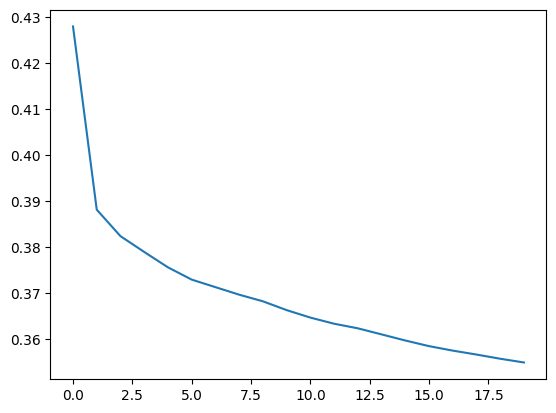

In [132]:
plt.plot(x.history["loss"])

In [133]:
x = model.fit(training_left, 
              training_right.values.reshape(-1),
              verbose=1,
              epochs=20)

Epoch 1/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 0.3543
Epoch 2/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - loss: 0.3532
Epoch 3/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - loss: 0.3528
Epoch 4/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - loss: 0.3521
Epoch 5/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - loss: 0.3509
Epoch 6/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - loss: 0.3508
Epoch 7/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - loss: 0.3501
Epoch 8/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - loss: 0.3497
Epoch 9/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step - loss: 0.3491
Epoch 10/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 884us/step - loss: 0.3483
Epoch 11/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - loss: 0.3480
Epoch 12/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - loss: 0.3477
Epoch 13/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - loss: 0.3470
Epoch 14/20
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - loss: 0.3465
E

In [134]:
x = model.fit(training_left, 
              training_right.values.reshape(-1),
              verbose=1,
              epochs=100)

Epoch 1/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - loss: 0.3439
Epoch 2/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - loss: 0.3438
Epoch 3/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - loss: 0.3431
Epoch 4/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - loss: 0.3426
Epoch 5/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - loss: 0.3427
Epoch 6/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3418
Epoch 7/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 885us/step - loss: 0.3420
Epoch 8/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - loss: 0.3407
Epoch 9/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - loss: 0.3409
Epoch 10/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - loss: 0.3405
Epoch 11/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - loss: 0.3405
Epoch 12/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 916us/step - loss: 0.3408
Epoch 13/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - loss: 0.3402
Epoch 14/100
1234/1234 ━━━━━━━━━━━━━━━━━━━━ 1s 819us/step - lo

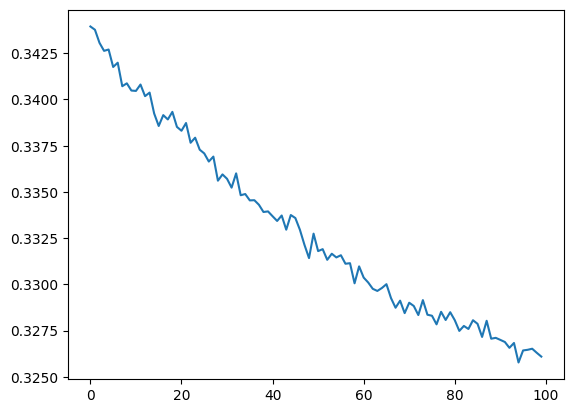

In [135]:
plt.plot(x.history["loss"])

In [138]:
x.history["loss"][-1]/0.4280

0.7619027779481121

In [142]:
p = model.predict(test_left)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step


In [148]:
(p > 0.5).reshape(-1).astype(int)

array([1, 0, 0, ..., 0, 0, 1], shape=(6513,))

In [164]:
r = (test_right == (p > 0.5).reshape(-1))

In [165]:
r.value_counts()

class
True     5082
False    1431
Name: count, dtype: int64

In [166]:
r.value_counts()[False] / r.value_counts()[True]

np.float64(0.28158205430932703)